In [2]:
import pandas as pd
df = pd.read_excel(r"C:\Users\T8567\Python related stuff\myproject\data\sample_nielsen_extended.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         672 non-null    datetime64[ns]
 1   market       672 non-null    object        
 2   channel      672 non-null    object        
 3   category     672 non-null    object        
 4   brand        672 non-null    object        
 5   value_sales  672 non-null    float64       
 6   unit_sales   672 non-null    float64       
 7   share        672 non-null    float64       
 8   Month-Year   672 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 47.4+ KB


In [6]:
df.duplicated().value_counts()

False    672
Name: count, dtype: int64

In [36]:
df.head()

,date,market,channel,category,brand,value_sales,unit_sales,share,Month-Year
0,2019-01-01,India,Modern Trade,Biscuits,Alpha,1278536.23,130574.52,30.97,Jan-2019
1,2019-01-01,India,Modern Trade,Biscuits,Beta,1080513.18,110350.79,26.17,Jan-2019
2,2019-01-01,India,Modern Trade,Biscuits,Gamma,967086.19,98766.70,23.43,Jan-2019
3,2019-01-01,India,Modern Trade,Biscuits,Delta,802164.15,81923.53,19.43,Jan-2019
4,2019-01-01,India,Modern Trade,Beverages,Fizz,3155632.13,179043.78,34.56,Jan-2019


In [37]:
df.describe()

,date,value_sales,unit_sales,share
count,672,6.720000e+02,672.000000,672.000000
mean,2022-06-16 14:17:08.571428608,1.779667e+06,123499.387813,24.999896
min,2019-01-01 00:00:00,6.439091e+05,66393.660000,15.300000
25%,2020-09-23 12:00:00,1.100772e+06,99009.400000,20.212500
50%,2022-06-16 00:00:00,1.494431e+06,118598.015000,25.005000
75%,2024-03-08 18:00:00,2.435417e+06,143970.587500,29.577500
max,2025-12-01 00:00:00,4.435833e+06,237074.970000,34.940000
std,NaN,8.315116e+05,32192.809220,5.181619


In [38]:

grouped_sales = df.groupby(['brand', 'category'])['value_sales'].sum().reset_index()

# Display the grouped sales
print(grouped_sales)


    brand   category   value_sales
0   Alpha   Biscuits  1.145719e+08
1    Beta   Biscuits  9.686192e+07
2   Delta   Biscuits  6.916728e+07
3    Fizz  Beverages  2.699262e+08
4   Gamma   Biscuits  8.745420e+07
5   Hydra  Beverages  1.859294e+08
6  Quench  Beverages  1.448905e+08
7  Splash  Beverages  2.271347e+08


In [39]:
import pandas as pd

# Load your sample Nielsen Excel
df = pd.read_excel(r"C:\Users\T8567\Python related stuff\myproject\data\sample_nielsen_extended.xlsx")

# Example: Market share by Brand within each Category & Market
market_share = (
    df.groupby(["category", "market", "brand"])["value_sales"].sum().reset_index()
)

# Calculate total sales per category & market
market_share["total_sales"] = market_share.groupby(["category", "market"])["value_sales"].transform("sum")

# Market Share %
market_share["market_share_percent"] = (market_share["value_sales"] / market_share["total_sales"]) * 100

# Sort by biggest share
market_share = market_share.sort_values(["category", "market", "market_share_percent"], ascending=[True, True, False])

print(market_share.head(10))

    category market   brand   value_sales   total_sales  market_share_percent
0  Beverages  India    Fizz  2.699262e+08  8.278808e+08             32.604480
3  Beverages  India  Splash  2.271347e+08  8.278808e+08             27.435680
1  Beverages  India   Hydra  1.859294e+08  8.278808e+08             22.458472
2  Beverages  India  Quench  1.448905e+08  8.278808e+08             17.501367
4   Biscuits  India   Alpha  1.145719e+08  3.680553e+08             31.128986
5   Biscuits  India    Beta  9.686192e+07  3.680553e+08             26.317221
7   Biscuits  India   Gamma  8.745420e+07  3.680553e+08             23.761159
6   Biscuits  India   Delta  6.916728e+07  3.680553e+08             18.792634


In [40]:
#  1. Import Libraries & Load Data
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Excel file
df = pd.read_excel(r"C:\Users\T8567\Python related stuff\myproject\data\sample_nielsen_extended.xlsx")
df.columns = [c.strip().lower() for c in df.columns]  # standardize column names
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.to_period("M").dt.to_timestamp()

In [41]:
# ============================================
# 📊 2. Monthly Aggregation
# ============================================
monthly = (
    df.groupby(["month","market","channel","category","brand"], as_index=False)
      .agg(value_sales=("value_sales","sum"),
           unit_sales=("unit_sales","sum"))
)

# Add share if not present
totals = monthly.groupby(["month","market","channel","category"], as_index=False)["value_sales"].sum()
totals = totals.rename(columns={"value_sales":"cat_total_value"})
monthly = monthly.merge(totals, on=["month","market","channel","category"], how="left")
monthly["share"] = (monthly["value_sales"] / monthly["cat_total_value"]) * 100

In [42]:
# ============================================
# 📈 3. Descriptive Statistics
# ============================================
def add_desc_stats(g: pd.DataFrame, col: str) -> pd.Series:
    s = g[col]
    return pd.Series({
        "mean": s.mean(),
        "median": s.median(),
        "min": s.min(),
        "max": s.max(),
        "std": s.std(ddof=1),
        "cv": (s.std(ddof=1) / s.mean()) if s.mean() else np.nan,
        "skew": s.skew(),
        "kurtosis": s.kurt()
    })

desc_stats = (
    monthly.groupby(["category","market"])
           .apply(add_desc_stats, col="value_sales")
           .reset_index()
)
print("\n📊 Descriptive Stats (Category + Market):\n", desc_stats.head())


📊 Descriptive Stats (Category + Market):
     category market          mean       median         min         max  \
0  Beverages  India  2.463931e+06  2435429.810  1237315.82  4435832.57   
1   Biscuits  India  1.095403e+06  1100346.525   643909.06  1694270.52   

             std        cv      skew  kurtosis  
0  630258.455539  0.255794  0.260831 -0.632723  
1  220070.650885  0.200904  0.204442 -0.687511  


C:\Users\T8567\AppData\Local\Temp\ipykernel_5116\3232497786.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(add_desc_stats, col="value_sales")


In [43]:
# ============================================
# 🚨 4. Outlier Detection (IQR Method)
# ============================================
def iqr_bounds(s: pd.Series):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    return q1 - 1.5*iqr, q3 + 1.5*iqr

outliers = []
for (cat, mkt, br), g in monthly.groupby(["category","market","brand"]):
    lower, upper = iqr_bounds(g["value_sales"])
    mask = (g["value_sales"] < lower) | (g["value_sales"] > upper)
    if mask.any():
        flagged = g.loc[mask, ["month","category","market","brand","value_sales"]].copy()
        flagged["lower_bound"], flagged["upper_bound"] = lower, upper
        outliers.append(flagged)

outliers = pd.concat(outliers, ignore_index=True) if outliers else pd.DataFrame()
print("\n🚨 Outliers:\n", outliers.head())


🚨 Outliers:
        month   category market brand  value_sales   lower_bound   upper_bound
0 2025-02-01  Beverages  India  Fizz   4435832.57  2.209593e+06  4.155626e+06
1 2023-02-01   Biscuits  India  Beta   1370803.47  9.234635e+05  1.360878e+06
2 2024-05-01   Biscuits  India  Beta   1372793.77  9.234635e+05  1.360878e+06
3 2025-02-01   Biscuits  India  Beta   1426707.37  9.234635e+05  1.360878e+06


Outliers for Beverages | India | Fizz:
  - 2025-02: 4435833


C:\Users\T8567\AppData\Local\Temp\ipykernel_17876\2760853022.py:126: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ex["value_sales"], vert=True, patch_artist=True,


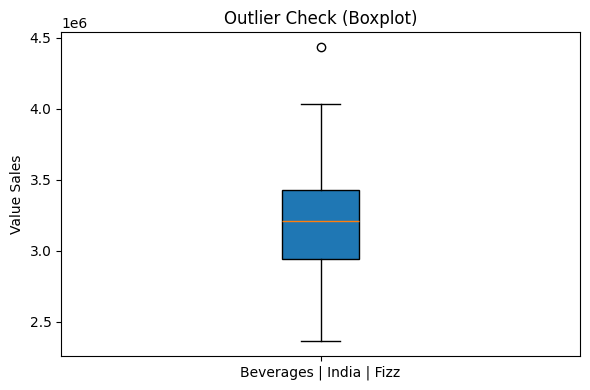

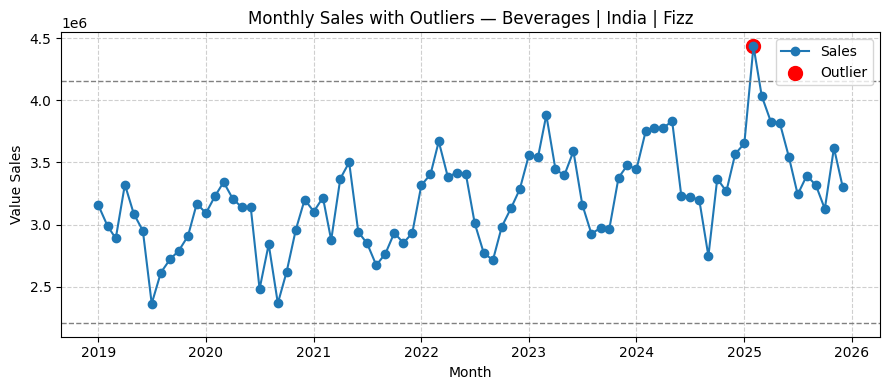

No outliers for Beverages | India | Hydra


C:\Users\T8567\AppData\Local\Temp\ipykernel_17876\2760853022.py:126: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ex["value_sales"], vert=True, patch_artist=True,


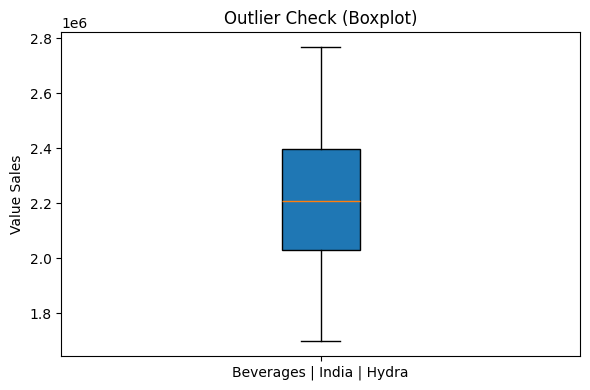

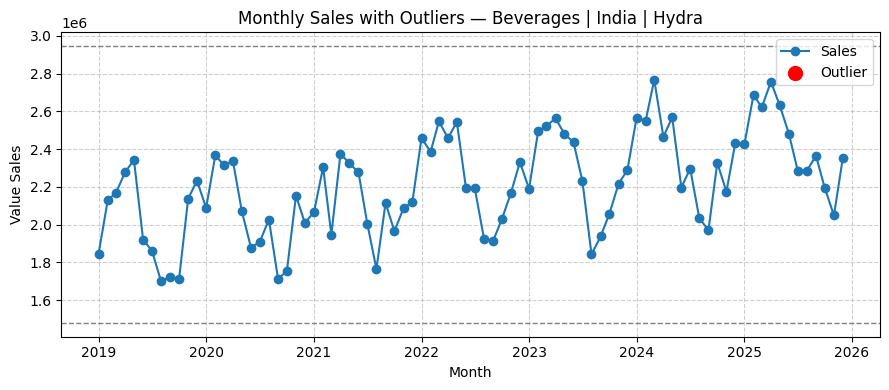

No outliers for Beverages | India | Quench


C:\Users\T8567\AppData\Local\Temp\ipykernel_17876\2760853022.py:126: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ex["value_sales"], vert=True, patch_artist=True,


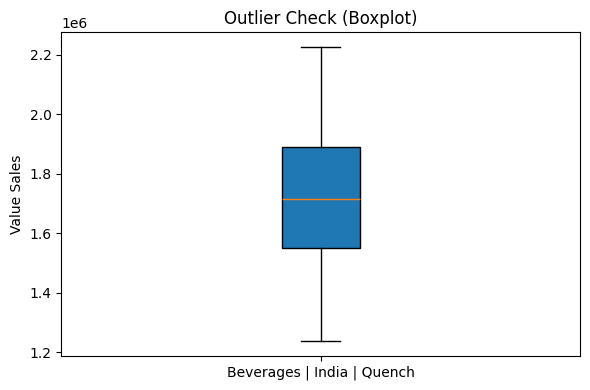

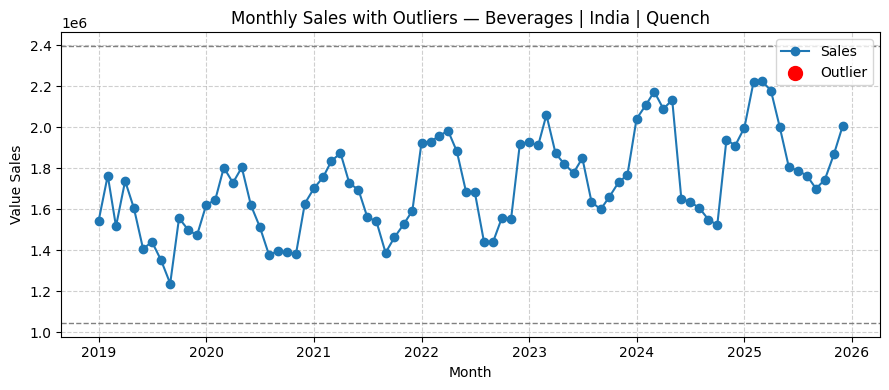

No outliers for Beverages | India | Splash


C:\Users\T8567\AppData\Local\Temp\ipykernel_17876\2760853022.py:126: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ex["value_sales"], vert=True, patch_artist=True,


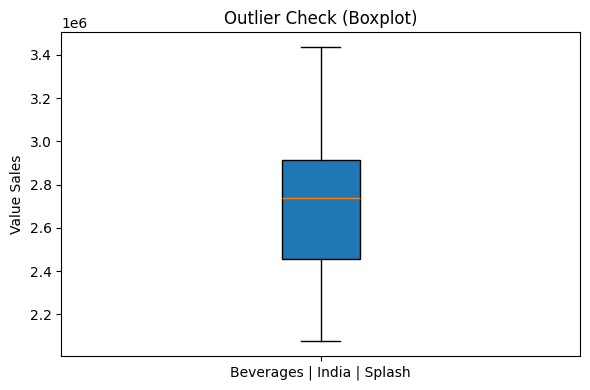

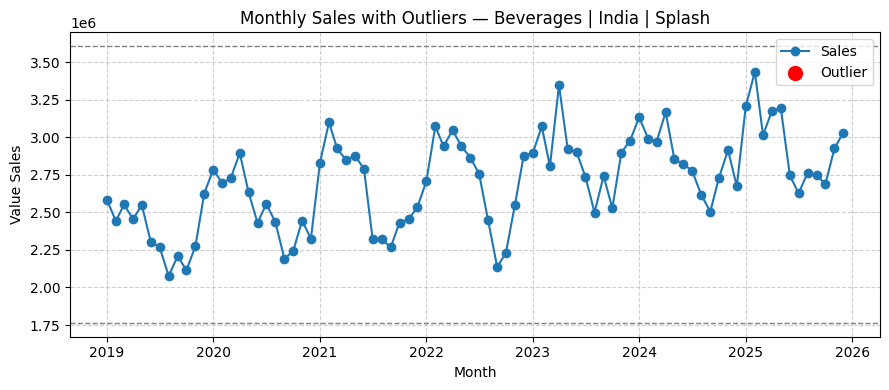

No outliers for Biscuits | India | Alpha


C:\Users\T8567\AppData\Local\Temp\ipykernel_17876\2760853022.py:126: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ex["value_sales"], vert=True, patch_artist=True,


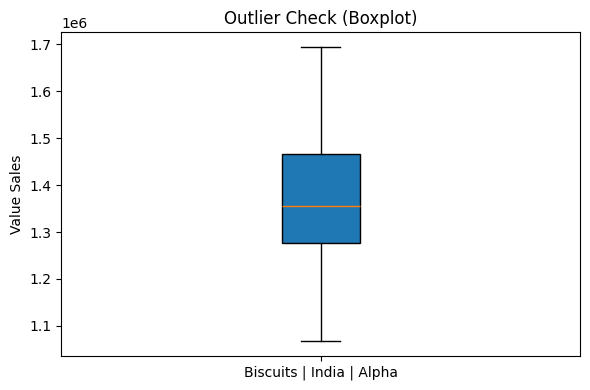

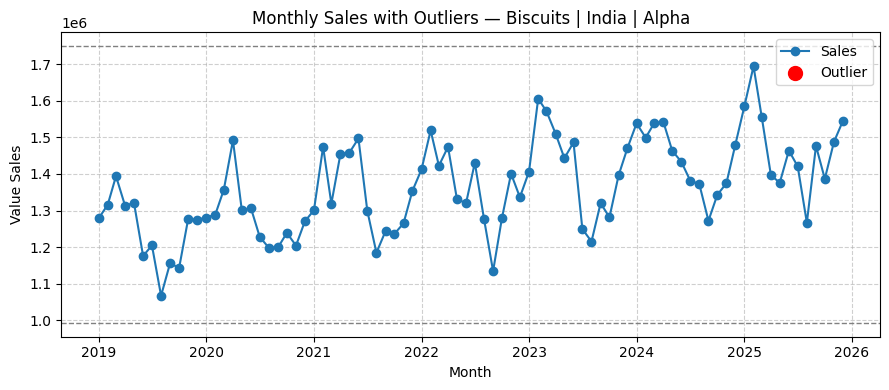

Outliers for Biscuits | India | Beta:
  - 2023-02: 1370803
  - 2024-05: 1372794
  - 2025-02: 1426707


C:\Users\T8567\AppData\Local\Temp\ipykernel_17876\2760853022.py:126: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ex["value_sales"], vert=True, patch_artist=True,


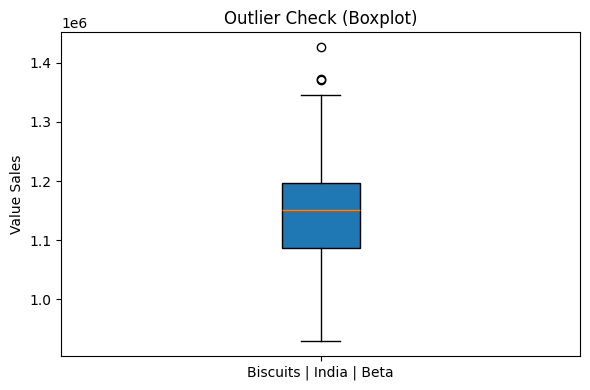

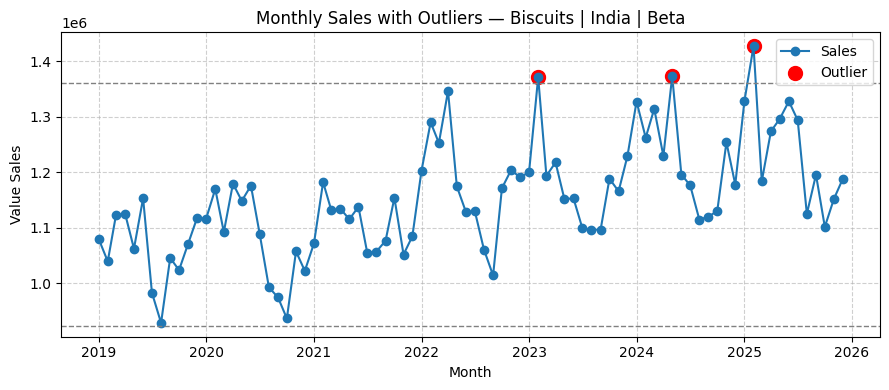

No outliers for Biscuits | India | Delta


C:\Users\T8567\AppData\Local\Temp\ipykernel_17876\2760853022.py:126: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ex["value_sales"], vert=True, patch_artist=True,


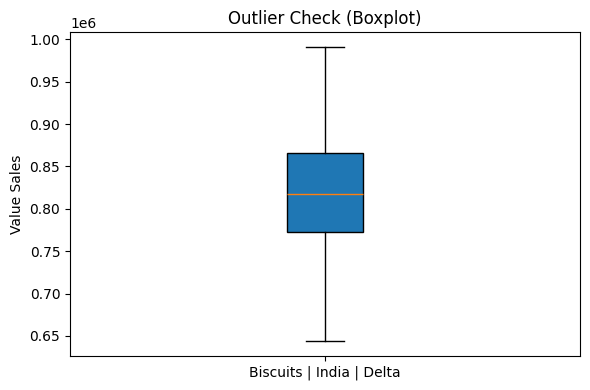

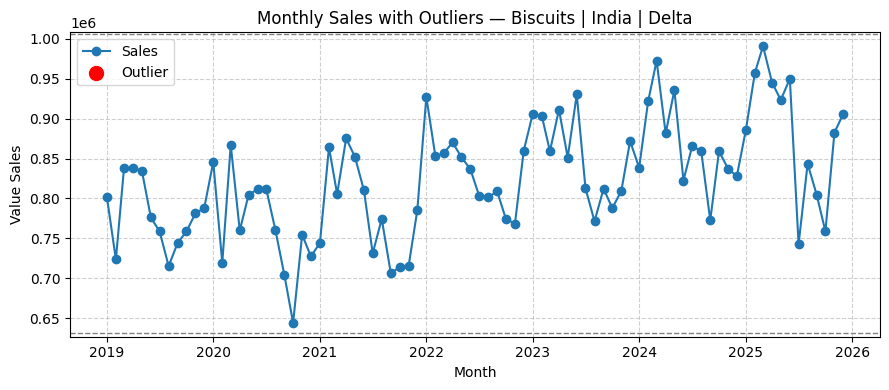

No outliers for Biscuits | India | Gamma


C:\Users\T8567\AppData\Local\Temp\ipykernel_17876\2760853022.py:126: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ex["value_sales"], vert=True, patch_artist=True,


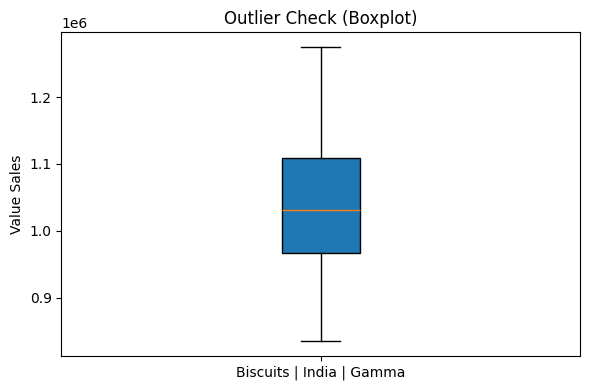

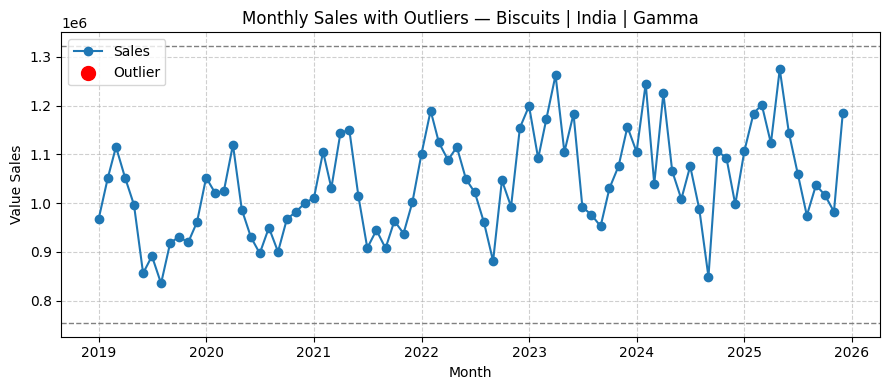

In [7]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Example: Load dataset (replace with your file if needed)
# df = pd.read_excel(r"C:\Users\T8567\Python related stuff\myproject\data\sample_nielsen_extended.xlsx")
# df.columns = [c.strip().lower() for c in df.columns]
# df["date"] = pd.to_datetime(df["date"])
# df["month"] = df["date"].dt.to_period("M").dt.to_timestamp()

# # Aggregate monthly sales
# monthly = (
#     df.groupby(["month","category","market","brand"], as_index=False)
#       .agg(value_sales=("value_sales","sum"))
# )

# # ----------------------------
# # Function to compute IQR bounds
# # ----------------------------
# def iqr_bounds(s: pd.Series):
#     q1, q3 = s.quantile(0.25), s.quantile(0.75)
#     iqr = q3 - q1
#     return q1 - 1.5*iqr, q3 + 1.5*iqr

# # ----------------------------
# # Select slice for plotting
# # ----------------------------
# CAT = "Biscuits"
# MKT = "India"
# BR  = "Alpha"

# example = monthly[
#     (monthly["category"] == CAT) &
#     (monthly["market"] == MKT) &
#     (monthly["brand"] == BR)
# ].sort_values("month")

# if example.empty:
#     print(f"No data found for {CAT} | {MKT} | {BR}")
# else:
#     # Compute bounds & mask outliers
#     lower, upper = iqr_bounds(example["value_sales"])
#     mask_out = (example["value_sales"] < lower) | (example["value_sales"] > upper)

#     # ----------------------------
#     # Boxplot
#     # ----------------------------
#     plt.figure(figsize=(6,4))
#     plt.boxplot(example["value_sales"], vert=True, patch_artist=True,
#                 labels=[f"{CAT} | {MKT} | {BR}"])
#     plt.title("Outlier Check (Boxplot)")
#     plt.ylabel("Value Sales")
#     plt.tight_layout()
#     plt.show()

#     # ----------------------------
#     # Line plot with outliers
#     # ----------------------------
#     plt.figure(figsize=(9,4))
#     plt.plot(example["month"], example["value_sales"], marker="o", label="Sales")
#     plt.scatter(example.loc[mask_out, "month"],
#                 example.loc[mask_out, "value_sales"],
#                 marker="o", s=100, c="red", label="Outlier")
#     plt.axhline(lower, linestyle="--", linewidth=1, color="gray")
#     plt.axhline(upper, linestyle="--", linewidth=1, color="gray")

#     plt.title(f"Monthly Sales with Outliers — {CAT} | {MKT} | {BR}")
#     plt.xlabel("Month")
#     plt.ylabel("Value Sales")
#     plt.legend()
#     plt.grid(True, linestyle="--", alpha=0.6)
#     plt.tight_layout()
#     plt.show()



import os
import pandas as pd
import matplotlib.pyplot as plt

# ==========================
# 0) CONFIG
# ==========================
FILE = r"C:\Users\T8567\Python related stuff\myproject\data\sample_nielsen_extended.xlsx"   # <-- your uploaded file
SAVE_PNG = False                                    # True to save plots as PNGs
OUTDIR = r"C:\Users\T8567\Python related stuff\myproject\data\nielsen_outlier_plots"         # where to save if SAVE_PNG=True

# Limit which slices to run (use "ALL" to include everything)
CATS   = "ALL"                 # e.g., ["Biscuits","Chocolates"] or "ALL"
MKTS   = "ALL"                 # e.g., ["India","UAE"]          or "ALL"
BRANDS = "ALL"                 # e.g., ["Alpha","Beta"]         or "ALL"

# Skip plotting when very few points (IQR isn’t meaningful with tiny samples)
MIN_POINTS_FOR_IQR = 4

# ==========================
# 1) LOAD & PREP
# ==========================
df = pd.read_excel(FILE)
df.columns = [c.strip().lower() for c in df.columns]

# Expecting columns like: date, category, market, brand, value_sales
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.to_period("M").dt.to_timestamp()

monthly = (
    df.groupby(["month", "category", "market", "brand"], as_index=False)
      .agg(value_sales=("value_sales", "sum"))
)

if SAVE_PNG and not os.path.exists(OUTDIR):
    os.makedirs(OUTDIR, exist_ok=True)

# ==========================
# 2) HELPERS
# ==========================
def iqr_bounds(s: pd.Series):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    return q1 - 1.5*iqr, q3 + 1.5*iqr

def plot_and_optionally_save(cat, mkt, br, ex, lower, upper, mask_out):
    title_tag = f"{cat} | {mkt} | {br}"

    # --- Boxplot
    plt.figure(figsize=(6,4))
    plt.boxplot(ex["value_sales"], vert=True, patch_artist=True,
                labels=[title_tag])
    plt.title("Outlier Check (Boxplot)")
    plt.ylabel("Value Sales")
    plt.tight_layout()
    if SAVE_PNG:
        plt.savefig(os.path.join(OUTDIR, f"boxplot__{cat}_{mkt}_{br}.png"), dpi=150)
    plt.show()

    # --- Line plot with outliers
    plt.figure(figsize=(9,4))
    plt.plot(ex["month"], ex["value_sales"], marker="o", label="Sales")
    plt.scatter(ex.loc[mask_out, "month"],
                ex.loc[mask_out, "value_sales"],
                s=100, c="red", label="Outlier")
    plt.axhline(lower, linestyle="--", linewidth=1, color="gray")
    plt.axhline(upper, linestyle="--", linewidth=1, color="gray")
    plt.title(f"Monthly Sales with Outliers — {title_tag}")
    plt.xlabel("Month")
    plt.ylabel("Value Sales")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    if SAVE_PNG:
        plt.savefig(os.path.join(OUTDIR, f"timeseries__{cat}_{mkt}_{br}.png"), dpi=150)
    plt.show()

# Resolve filters
cats   = monthly["category"].unique().tolist() if CATS   == "ALL" else CATS
mkts   = monthly["market"].unique().tolist()   if MKTS   == "ALL" else MKTS
brands = monthly["brand"].unique().tolist()    if BRANDS == "ALL" else BRANDS

# ==========================
# 3) LOOP ALL COMBOS
# ==========================
for cat in cats:
    for mkt in mkts:
        # Brands that actually exist for this (cat, mkt)
        brands_here = (monthly[(monthly["category"]==cat) &
                               (monthly["market"]==mkt)]["brand"]
                       .unique().tolist())

        # Intersect with requested brands
        sel_brands = [b for b in brands if b in brands_here]

        for br in sel_brands:
            ex = (monthly[(monthly["category"]==cat) &
                          (monthly["market"]==mkt) &
                          (monthly["brand"]==br)]
                  .sort_values("month"))

            if ex.empty:
                continue

            if ex.shape[0] < MIN_POINTS_FOR_IQR:
                print(f"Skipping (few points): {cat} | {mkt} | {br} ({ex.shape[0]} months)")
                continue

            lower, upper = iqr_bounds(ex["value_sales"])
            mask_out = (ex["value_sales"] < lower) | (ex["value_sales"] > upper)

            # Print a quick summary of outliers
            if mask_out.any():
                out_months = ex.loc[mask_out, "month"].dt.strftime("%Y-%m").tolist()
                out_vals   = ex.loc[mask_out, "value_sales"].round(0).astype(int).tolist()
                print(f"Outliers for {cat} | {mkt} | {br}:")
                for m, v in zip(out_months, out_vals):
                    print(f"  - {m}: {v}")
            else:
                print(f"No outliers for {cat} | {mkt} | {br}")

            # Plot (and save if enabled)
            plot_and_optionally_save(cat, mkt, br, ex, lower, upper, mask_out)


In [45]:
# ============================================
# 📉 5. Rolling Trends (3-Month Moving Average)
# ============================================
monthly_sorted = monthly.sort_values(["category","market","brand","month"]).copy()
monthly_sorted["value_sales_roll3"] = (
    monthly_sorted.groupby(["category","market","brand"])["value_sales"]
                  .transform(lambda s: s.rolling(3, min_periods=1).mean())
)
print("\n📉 Rolling 3-Month Trends:\n", monthly_sorted.head())


📉 Rolling 3-Month Trends:
         month   category market brand  value_sales  value_sales_roll3
0  2019-01-01  Beverages  India  Fizz   3155632.13       3.155632e+06
8  2019-02-01  Beverages  India  Fizz   2989753.74       3.072693e+06
16 2019-03-01  Beverages  India  Fizz   2889094.68       3.011494e+06
24 2019-04-01  Beverages  India  Fizz   3322744.23       3.067198e+06
32 2019-05-01  Beverages  India  Fizz   3088122.76       3.099987e+06


In [47]:

# ============================================
# 📆 6. Seasonality (Average Sales by Month Number)
# ============================================
monthly_sorted["month_num"] = monthly_sorted["month"].dt.month
seasonality = (
    monthly_sorted.groupby(["category","market","month"], as_index=False)
                  .agg(avg_value_sales=("value_sales","mean"),
                       avg_unit_sales=("unit_sales","mean"))
)
print("\n📆 Seasonality:\n", seasonality.head())

KeyError: "Column(s) ['unit_sales'] do not exist"


🎯 Pareto (Top Brands):
     category market   brand   value_sales  cat_mkt_total  share_pct  \
0  Beverages  India    Fizz  2.699262e+08   8.278808e+08  32.604480   
3  Beverages  India  Splash  2.271347e+08   8.278808e+08  27.435680   
1  Beverages  India   Hydra  1.859294e+08   8.278808e+08  22.458472   
2  Beverages  India  Quench  1.448905e+08   8.278808e+08  17.501367   
4   Biscuits  India   Alpha  1.145719e+08   3.680553e+08  31.128986   

   cum_share_pct  
0      32.604480  
3      60.040161  
1      82.498633  
2     100.000000  
4      31.128986  


C:\Users\T8567\AppData\Local\Temp\ipykernel_17876\2327605918.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(subset["brand"], rotation=45, ha="right")


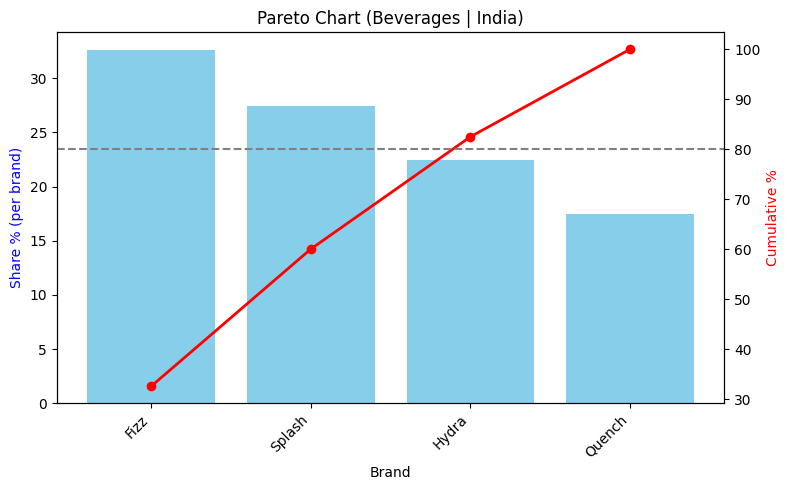

C:\Users\T8567\AppData\Local\Temp\ipykernel_17876\2327605918.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(subset["brand"], rotation=45, ha="right")


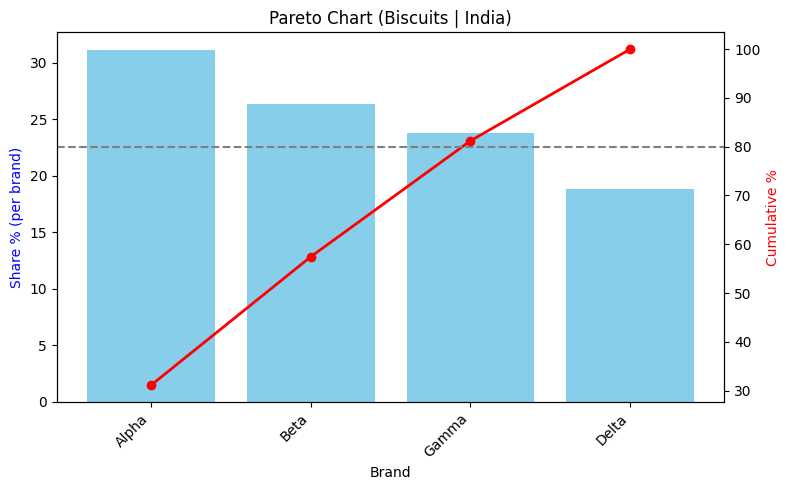

In [10]:
# # ============================================
# # 🎯 7. Pareto Analysis (80/20 Rule)
# # ============================================
# brand_totals = (
#     monthly.groupby(["category","market","brand"], as_index=False)
#            .agg(value_sales=("value_sales","sum"))
# )
# totals_cm = brand_totals.groupby(["category","market"], as_index=False)["value_sales"].sum() \
#                         .rename(columns={"value_sales":"cat_mkt_total"})
# brand_totals = brand_totals.merge(totals_cm, on=["category","market"], how="left")
# brand_totals["share_pct"] = 100 * brand_totals["value_sales"] / brand_totals["cat_mkt_total"]
# brand_totals = brand_totals.sort_values(["category","market","share_pct"], ascending=[True, True, False])
# brand_totals["cum_share_pct"] = brand_totals.groupby(["category","market"])["share_pct"].cumsum()
# print("\n🎯 Pareto (Top Brands):\n", brand_totals.head())


import pandas as pd
import matplotlib.pyplot as plt

# ============================================
# 🎯 7. Pareto Analysis (80/20 Rule)
# ============================================

# Aggregate brand totals
brand_totals = (
    monthly.groupby(["category","market","brand"], as_index=False)
           .agg(value_sales=("value_sales","sum"))
)

# Category-market totals
totals_cm = (brand_totals.groupby(["category","market"], as_index=False)["value_sales"].sum()
             .rename(columns={"value_sales":"cat_mkt_total"}))

brand_totals = brand_totals.merge(totals_cm, on=["category","market"], how="left")

# Share % and cumulative share %
brand_totals["share_pct"] = 100 * brand_totals["value_sales"] / brand_totals["cat_mkt_total"]
brand_totals = brand_totals.sort_values(["category","market","share_pct"], ascending=[True, True, False])
brand_totals["cum_share_pct"] = brand_totals.groupby(["category","market"])["share_pct"].cumsum()

print("\n🎯 Pareto (Top Brands):\n", brand_totals.head())

# ============================================
# 🎨 Function to plot Pareto chart
# ============================================
def plot_pareto(df, category, market="India"):
    subset = df[(df["category"]==category) & (df["market"]==market)]
    if subset.empty:
        print(f"No data for {category} | {market}")
        return
    
    fig, ax1 = plt.subplots(figsize=(8,5))

    # Bar chart (brand share %)
    ax1.bar(subset["brand"], subset["share_pct"], color="skyblue")
    ax1.set_ylabel("Share % (per brand)", color="blue")
    ax1.set_xlabel("Brand")
    ax1.set_xticklabels(subset["brand"], rotation=45, ha="right")

    # Line chart (cumulative %)
    ax2 = ax1.twinx()
    ax2.plot(subset["brand"], subset["cum_share_pct"], color="red", marker="o", linewidth=2)
    ax2.set_ylabel("Cumulative %", color="red")
    ax2.axhline(80, color="gray", linestyle="--")  # 80% line

    plt.title(f"Pareto Chart ({category} | {market})")
    plt.tight_layout()
    plt.show()

# ============================================
# 📊 Generate Pareto charts
# ============================================
plot_pareto(brand_totals, "Beverages", "India")
plot_pareto(brand_totals, "Biscuits", "India")


In [49]:
# ============================================
# 🔗 8. Correlation Matrix
# ============================================
num_cols = [c for c in ["value_sales","unit_sales","share"] if c in monthly.columns]
corr = monthly[num_cols].corr()
print("\n🔗 Correlation Matrix:\n", corr)


🔗 Correlation Matrix:
              value_sales
value_sales          1.0


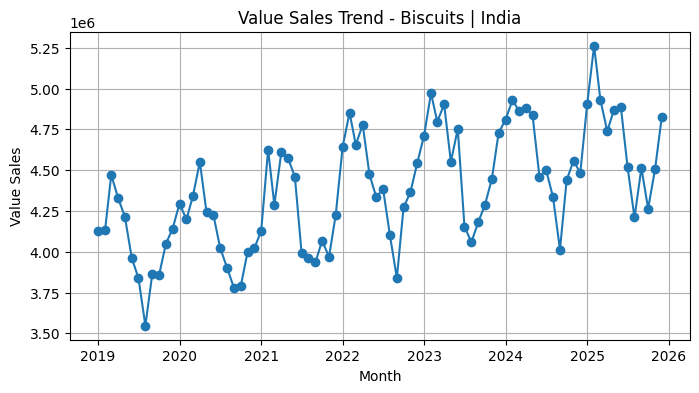

In [50]:
# ============================================
# 📊 9. Example Plot
# ============================================
example = monthly[(monthly["category"]=="Biscuits") & (monthly["market"]=="India")]
ex_series = example.groupby("month", as_index=False)["value_sales"].sum()

plt.figure(figsize=(8,4))
plt.plot(ex_series["month"], ex_series["value_sales"], marker="o")
plt.title("Value Sales Trend - Biscuits | India")
plt.xlabel("Month")
plt.ylabel("Value Sales")
plt.grid(True)
plt.show()

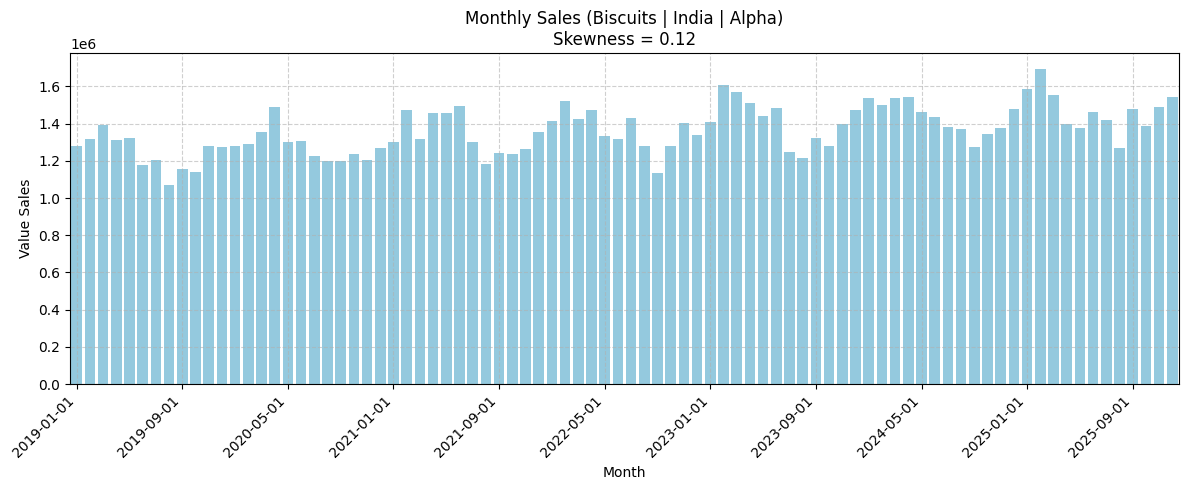

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel(r"C:\Users\T8567\Python related stuff\myproject\data\sample_nielsen_extended.xlsx")
df.columns = [c.strip().lower() for c in df.columns]
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.to_period("M").dt.to_timestamp()

# Aggregate monthly sales
monthly = (
    df.groupby(["month","category","market","brand"], as_index=False)
      .agg(value_sales=("value_sales","sum"))
)

# Example slice
CAT, MKT, BR = "Biscuits", "India", "Alpha"
example = monthly[
    (monthly["category"]==CAT) &
    (monthly["market"]==MKT) &
    (monthly["brand"]==BR)
]

if example.empty:
    print("No data found for this slice.")
else:
    sales = example["value_sales"]
    skew_val = sales.skew()

    # --- Bar chart with readable x-axis ---
    plt.figure(figsize=(12,5))
    sns.barplot(x="month", y="value_sales", data=example, color="skyblue")

    plt.title(f"Monthly Sales ({CAT} | {MKT} | {BR})\nSkewness = {skew_val:.2f}")
    plt.xlabel("Month")
    plt.ylabel("Value Sales")

    # Rotate labels and show only every 3rd month to avoid clutter
    plt.xticks(rotation=45, ha="right")
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=12))  # about 12 ticks (1 per quarter)

    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


In [ ]:
## Skewness By columns

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

# -------------------------------

# 1. Load Data

# -------------------------------

df = pd.read_excel(r"C:\Users\T8567\Python related stuff\myproject\data\sample_nielsen_extended.xlsx")
print(df)

df.columns = [c.strip().lower() for c in df.columns]

df["date"] = pd.to_datetime(df["date"])

df["month"] = df["date"].dt.to_period("M").dt.to_timestamp()

# -------------------------------

# 2. Aggregate monthly data

# -------------------------------

monthly = (

    df.groupby(["month","category","market","brand"], as_index=False)

      .agg(value_sales=("value_sales","sum"),

           unit_sales=("unit_sales","sum"),

           share=("share","mean"))   # share may already be %

)

# -------------------------------

# 3. Skewness check for each numeric column

# -------------------------------

numeric_cols = ["value_sales", "unit_sales", "share"]

for col in numeric_cols:

    series = monthly[col].dropna()

    # Calculate skewness

    skew_val = series.skew()

    print(f"📊 Skewness for {col}: {skew_val:.2f}")

    # Histogram + KDE

    plt.figure(figsize=(7,4))

    sns.histplot(series, kde=True, bins=20, color="skyblue")

    plt.title(f"Distribution of {col}\nSkewness = {skew_val:.2f}")

    plt.xlabel(col)

    plt.ylabel("Frequency")

    plt.grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()

    plt.show()

    # Boxplot

    plt.figure(figsize=(6,3))

    sns.boxplot(x=series, color="lightgreen")

    plt.title(f"Boxplot of {col}")

    plt.xlabel(col)

    plt.tight_layout()

    plt.show()

In [ ]:
#Hypothesis testing

import pandas as pd
from scipy import stats

# Load data
df = pd.read_excel(r"C:\Users\T8567\Python related stuff\myproject\data\sample_nielsen_extended.xlsx")
df.columns = [c.strip().lower() for c in df.columns]

# Compare categories (2 groups)

biscuits = df[df["category"] == "Biscuits"]["value_sales"].dropna()
beverages = df[df["category"] == "Beverages"]["value_sales"].dropna()

t_stat, p_val = stats.ttest_ind(biscuits, beverages, equal_var=False)

print("T-Test: Biscuits vs Beverages")
print(f"T-statistic = {t_stat:.3f}, p-value = {p_val:.4f}")

if p_val < 0.05:
    print("✅ Significant difference between Biscuits and Beverages sales.")
else:
    print("❌ No significant difference between Biscuits and Beverages sales.")

T-Test: Biscuits vs Beverages
T-statistic = -37.577, p-value = 0.0000
✅ Significant difference between Biscuits and Beverages sales.


In [58]:
import pandas as pd

from scipy import stats

# Load dataset

df = pd.read_excel(r"C:\Users\T8567\Python related stuff\myproject\data\sample_nielsen_extended.xlsx")

df.columns = [c.strip().lower() for c in df.columns]

# Focus on one category (example: Biscuits)

subset = df[df["category"] == "Biscuits"].copy()

# --- Normality test for each brand ---

print("Normality test (Shapiro-Wilk):")

for br, g in subset.groupby("brand"):

    sales = g["value_sales"].dropna()

    if len(sales) > 3:  # Shapiro needs at least 3 points

        stat, p = stats.shapiro(sales)

        print(f"{br}: p-value={p:.4f} -> {'Normal' if p > 0.05 else 'Not Normal'}")

    else:

        print(f"{br}: Not enough data for test")

Normality test (Shapiro-Wilk):
Alpha: p-value=0.7088 -> Normal
Beta: p-value=0.3344 -> Normal
Delta: p-value=0.8225 -> Normal
Gamma: p-value=0.5544 -> Normal


In [11]:
import pandas as pd
from scipy import stats

# Optional libs (nice to have, but script works without them)
try:
    import pingouin as pg  # for Welch's ANOVA
except Exception:
    pg = None

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# =========================
# 1) Load & subset
# =========================
DATA_FILE = r"C:\Users\T8567\Python related stuff\myproject\data\sample_nielsen_extended.xlsx"
TARGET_CATEGORY = "Biscuits"   # <-- change if needed

df = pd.read_excel(DATA_FILE)
df.columns = [c.strip().lower() for c in df.columns]

subset = df[df["category"] == TARGET_CATEGORY].copy()
subset = subset[["brand", "value_sales"]].dropna()

if subset.empty:
    raise ValueError(f"No rows found for category = {TARGET_CATEGORY}")

# Build per-brand arrays
brand_groups = {br: g["value_sales"].dropna().values
                for br, g in subset.groupby("brand")}
# Keep only brands with at least 2 observations
brand_groups = {k: v for k, v in brand_groups.items() if len(v) >= 2}

if len(brand_groups) < 2:
    raise ValueError("Need at least two brands with >=2 data points each.")

print(f"Analyzing category: {TARGET_CATEGORY}")
print("Brands included:", ", ".join(brand_groups.keys()))


# =========================
# 2) Normality (Shapiro)
# =========================
all_normal = True
print("\nNormality (Shapiro–Wilk):")
for br, vals in brand_groups.items():
    stat, p = stats.shapiro(vals)
    print(f"  {br}: p={p:.4f} -> {'Normal' if p > 0.05 else 'Not normal'}")
    if p <= 0.05:
        all_normal = False


# =========================
# 3) Equal variances (Levene)
# =========================
levene_p = None
equal_var = None
if all_normal:
    stat, levene_p = stats.levene(*brand_groups.values())
    equal_var = (levene_p > 0.05)
    print(f"\nLevene’s test p={levene_p:.4f} -> "
          f"{'Equal variances' if equal_var else 'Unequal variances'}")
else:
    print("\nSkipped Levene (data not normal in at least one brand).")


# =========================
# 4) Pick & run the right test
# =========================
def run_standard_anova(df_subset):
    model = ols("value_sales ~ C(brand)", data=df_subset).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    f = anova_table.loc["C(brand)", "F"]
    p = anova_table.loc["C(brand)", "PR(>F)"]
    print("\nStandard ANOVA (equal variances):")
    print(anova_table)
    return float(f), float(p)

def run_welch_anova(df_subset):
    if pg is None:
        print("\nWelch’s ANOVA requested but pingouin is not installed; "
              "falling back to Kruskal–Wallis.")
        return None, None
    res = pg.welch_anova(dv="value_sales", between="brand", data=df_subset)
    print("\nWelch’s ANOVA (unequal variances):")
    print(res)
    f = res.loc[0, "F"]
    p = res.loc[0, "p-unc"]
    return float(f), float(p)

def run_kruskal(groups_dict):
    h, p = stats.kruskal(*groups_dict.values())
    print("\nKruskal–Wallis (non-parametric):")
    print(f"H-statistic = {h:.3f}, p-value = {p:.4f}")
    return float(h), float(p)

test_name = ""
test_stat, test_p = None, None

if all_normal and equal_var:
    test_name = "Standard ANOVA"
    test_stat, test_p = run_standard_anova(subset)

elif all_normal and not equal_var:
    if pg is not None:
        test_name = "Welch’s ANOVA"
        test_stat, test_p = run_welch_anova(subset)
    else:
        test_name = "Kruskal–Wallis (fallback)"
        test_stat, test_p = run_kruskal(brand_groups)

else:  # not normal
    test_name = "Kruskal–Wallis"
    test_stat, test_p = run_kruskal(brand_groups)

print(f"\nChosen test: {test_name}")
print(f"Test statistic = {test_stat:.3f} | p-value = {test_p:.4f}")

if test_p < 0.05:
    print("✅ Difference across brands is statistically significant.")
else:
    print("❌ No statistically significant difference across brands.")


# =========================
# 5) Post-hoc (only if standard ANOVA and significant)
# =========================
if test_name == "Standard ANOVA" and test_p < 0.05:
    print("\nPost-hoc (Tukey HSD):")
    tukey = pairwise_tukeyhsd(endog=subset["value_sales"],
                              groups=subset["brand"],
                              alpha=0.05)
    print(tukey.summary())
else:
    print("\n(Post-hoc Tukey only runs after significant standard ANOVA.)")

Analyzing category: Biscuits
Brands included: Alpha, Beta, Delta, Gamma

Normality (Shapiro–Wilk):
  Alpha: p=0.7088 -> Normal
  Beta: p=0.3344 -> Normal
  Delta: p=0.8225 -> Normal
  Gamma: p=0.5544 -> Normal

Levene’s test p=0.0000 -> Unequal variances

Welch’s ANOVA (unequal variances):
  Source  ddof1       ddof2           F         p-unc       np2
0  brand      3  180.567215  470.481444  4.575779e-85  0.788879

Chosen test: Welch’s ANOVA
Test statistic = 470.481 | p-value = 0.0000
✅ Difference across brands is statistically significant.

(Post-hoc Tukey only runs after significant standard ANOVA.)


In [61]:
import pandas as pd

# Load the Excel file
file_path = r"C:\Users\T8567\Python related stuff\myproject\data\sample_nielsen_extended.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1', engine='openpyxl')

# Convert date column to datetime if needed
if pd.api.types.is_numeric_dtype(df['date']):
    df['date'] = pd.to_datetime(df['date'], unit='D', origin='1899-12-30')

# Extract month and year for grouping
df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()

# Group by month and brand to get total value_sales
monthly_sales = df.groupby(['month', 'brand'])['value_sales'].sum().reset_index()

# Pivot for easier viewing
pivot_table = monthly_sales.pivot(index='month', columns='brand', values='value_sales')

print("Monthly value_sales for each brand:")
print(pivot_table.head(12))

Monthly value_sales for each brand:
brand            Alpha        Beta      Delta        Fizz       Gamma  \
month                                                                   
2019-01-01  1278536.23  1080513.18  802164.15  3155632.13   967086.19   
2019-02-01  1316210.89  1039731.05  723453.26  2989753.74  1051029.44   
2019-03-01  1394086.55  1123040.66  838454.83  2889094.68  1115505.52   
2019-04-01  1312859.58  1125294.55  838045.06  3322744.23  1051744.26   
2019-05-01  1321548.52  1062570.92  835000.32  3088122.76   996601.42   
2019-06-01  1176088.09  1153283.67  776098.53  2950776.87   855972.11   
2019-07-01  1205038.58   983340.53  758524.53  2364264.82   891219.40   
2019-08-01  1067513.71   929160.73  715214.69  2614240.64   835075.88   
2019-09-01  1157437.79  1045967.13  744198.94  2720400.54   918392.92   
2019-10-01  1142270.66  1024031.16  758510.22  2790670.14   930745.70   
2019-11-01  1277328.53  1071706.16  781362.44  2908154.75   919224.99   
2019-12-01  127

In [62]:
import pandas as pd
from scipy.stats import f_oneway, kruskal

# Load your dataset
df = pd.read_excel(r"C:\Users\T8567\Python related stuff\myproject\data\sample_nielsen_extended.xlsx")
df['month'] = pd.to_datetime(df['date']).dt.month

# Group sales by month
monthly_sales = [group['value_sales'].values for _, group in df.groupby('month')]

# ANOVA test (if sales are normal)
f_stat, p_val_anova = f_oneway(*monthly_sales)
print("ANOVA Seasonality Test -> F-stat:", f_stat, ", p-value:", p_val_anova)

# Kruskal test (if sales are not normal)
h_stat, p_val_kruskal = kruskal(*monthly_sales)
print("Kruskal Seasonality Test -> H-stat:", h_stat, ", p-value:", p_val_kruskal)

# Interpretation
if p_val_anova < 0.05 or p_val_kruskal < 0.05:
    print("✅ Significant seasonality detected (sales differ across months).")
else:
    print("❌ No strong evidence of seasonality.")

ANOVA Seasonality Test -> F-stat: 1.4036369740318004 , p-value: 0.16635263066462752
Kruskal Seasonality Test -> H-stat: 13.999332868363126 , p-value: 0.23303039480033697
❌ No strong evidence of seasonality.
